## MNIST Handwritten Digit Classifier

The MNIST Handwritten Digit Classification task involves recognizing and classifying images of handwritten digits (0-9) from the MNIST dataset. The dataset consists of 60,000 training images and 10,000 test images, each a grayscale image of size 28x28 pixels.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

#### Prepare Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


#### Create Model

In [4]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

#### Compile Model

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 64)            │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,154 (422.48 KB)

 Trainable params: 108,154 (422.48 KB)

 Non-trainable params: 0 (0.00 B)

#### Train Model

In [7]:
epochs = 10
history = model.fit(
  train_images,
  train_labels,
  epochs = epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 184s 97ms/step - accuracy: 0.8960 - loss: 0.3214
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 182s 97ms/step - accuracy: 0.9846 - loss: 0.0486
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 204s 98ms/step - accuracy: 0.9897 - loss: 0.0347
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 199s 97ms/step - accuracy: 0.9922 - loss: 0.0256
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 181s 97ms/step - accuracy: 0.9928 - loss: 0.0214
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 181s 96ms/step - accuracy: 0.9949 - loss: 0.0160
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 96ms/step - accuracy: 0.9958 - loss: 0.0137
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 182s 97ms/step - accuracy: 0.9964 - loss: 0.0114
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 97ms/step - accuracy: 0.9961 - loss: 0.0110
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 97ms/step - accuracy: 0.9967 - loss: 0.0098


#### Visualize Training Results

Text(0.5, 1.0, 'Training Accuracy and Loss')

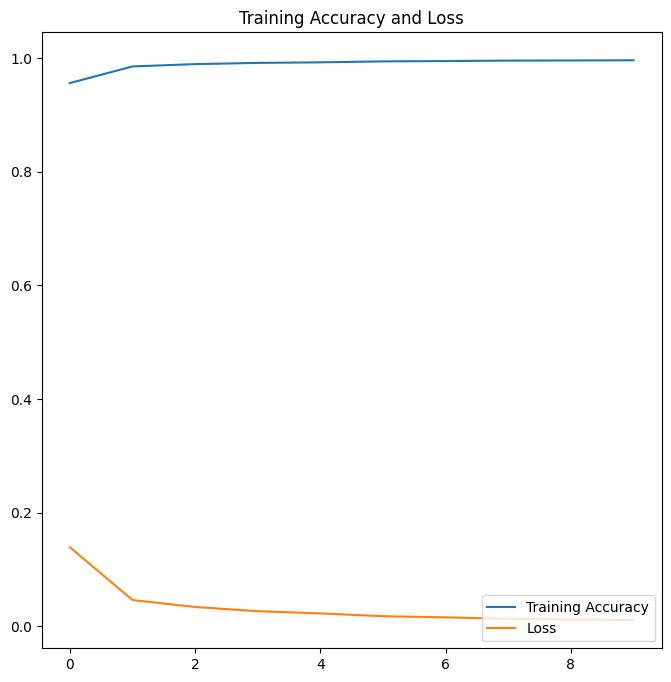

In [8]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')

#### Test Image

Prediction of model: 0


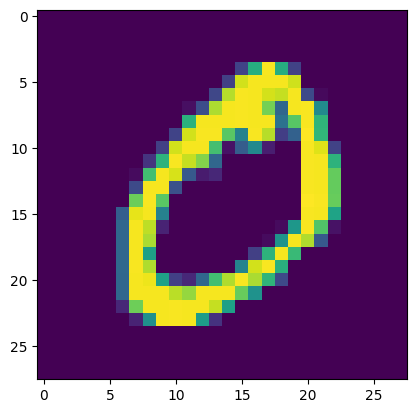

In [15]:
image = (train_images[1]).reshape(1,28,28,1)
model_pred = model.predict(image, verbose=0)
predicted_class = np.argmax(model_pred, axis=-1)
plt.imshow(image.reshape(28, 28))
print('Prediction of model: {}'.format(predicted_class[0]))


Prediction of model: 4


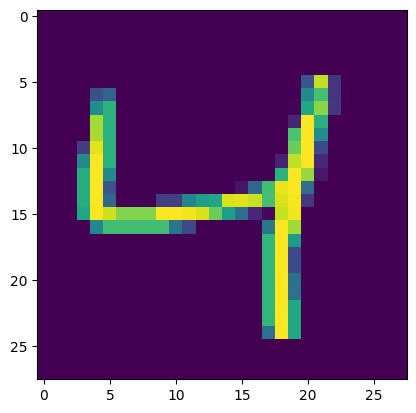

In [16]:
image = (train_images[2]).reshape(1,28,28,1)
model_pred = model.predict(image, verbose=0)
predicted_class = np.argmax(model_pred, axis=-1)
plt.imshow(image.reshape(28, 28))
print('Prediction of model: {}'.format(predicted_class[0]))

#### Test Multiple Image

Test images array shape: (4, 28, 28)
Predicted digit: 2
Predicted digit: 1
Predicted digit: 0
Predicted digit: 4


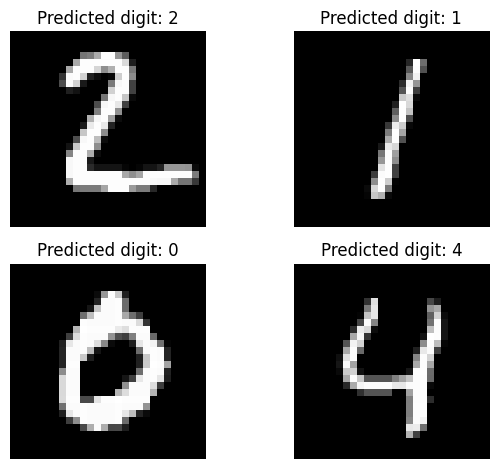

In [19]:
# Select and reshape test images
images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print("Test images array shape: {}".format(images.shape))

# Iterate through images and make predictions
for i, test_image in enumerate(images, start=1):

    org_image = test_image  # Keep the original image for display
    test_image = test_image.reshape(1, 28, 28, 1)  # Reshape for the model
    prediction = model.predict(test_image, verbose=0)  # Get probabilities

    # Extract the predicted class label
    predicted_class = np.argmax(prediction, axis=-1)

    print("Predicted digit: {}".format(predicted_class[0]))

    # Plot the image and display the prediction
    plt.subplot(220 + i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(predicted_class[0]))
    plt.imshow(org_image, cmap='gray')  # Use grayscale colormap

plt.tight_layout()
plt.show()

#### Save Model

In [23]:
model.save("tf-cnn-model.h5")

#### Load Model

Prediction of model: 4


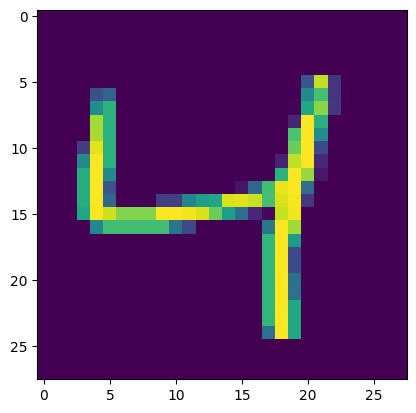

In [28]:
from tensorflow.keras.models import load_model

loaded_model = load_model("tf-cnn-model.h5")
image = train_images[2].reshape(1, 28, 28, 1)
model_pred = loaded_model.predict(image, verbose=0)

predicted_class = np.argmax(model_pred, axis=-1)

plt.imshow(image.reshape(28, 28))

print('Prediction of model: {}'.format(predicted_class[0]))